In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction import image
from sklearn.neural_network import BernoulliRBM

%matplotlib inline

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
dict = unpickle('data/data_batch_1');

In [4]:
dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [14]:
dict[b'batch_label'][:5]

b'train'

In [5]:
dict[b'data'].shape

(10000, 3072)

In [6]:
data = dict[b'data']
data[:20, :].shape

(20, 3072)

In [8]:
data[:5, :20]

array([[ 59,  43,  50,  68,  98, 119, 139, 145, 149, 149, 131, 125, 142,
        144, 137, 129, 137, 134, 124, 139],
       [154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123,
        127, 181, 217, 209, 166, 164, 158],
       [255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 254, 245, 226, 244, 241],
       [ 28,  37,  38,  42,  44,  40,  40,  24,  32,  43,  30,  32,  41,
         52,  67,  50,  44,  43,  38,  38],
       [170, 168, 177, 183, 181, 177, 181, 184, 189, 189, 188, 183, 182,
        184, 184, 180, 177, 177, 177, 176]], dtype=uint8)

In [12]:
labels = dict[b'labels']
labels[:5]

[6, 9, 9, 4, 1]

In [13]:
# Try to use MLP
from sklearn.neural_network import MLPClassifier

//use cross val to split the data

X_train = data[:200, :]
y_train = labels[:200]

X_test = data[200:300, :]
y_test = labels[200:300]

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(3072,), activation='logistic')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)


//calculate the accuracy



MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

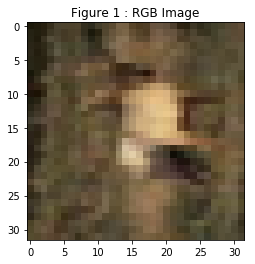

In [26]:
rgb_img = np.reshape(data[3],(32, 32, 3), order='F')

plt.plot()
plt.title('Figure 1 : RGB Image')
plt.imshow(rgb_img, interpolation='nearest');

In [38]:
patches = image.extract_patches_2d(rgb_img, (3, 3))

In [35]:
patches.shape

(961, 2, 2, 3)

In [39]:
reconstructed = image.reconstruct_from_patches_2d(patches, (32, 32, 3))

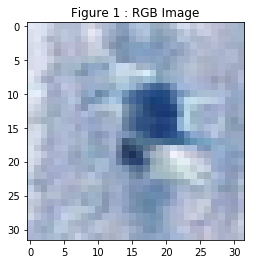

In [40]:
plt.plot()
plt.title('Figure 1 : RGB Image')
plt.imshow(reconstructed, interpolation='nearest');

In [45]:
labels = dict[b'labels']
print(labels[:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [51]:
rbm = BernoulliRBM(n_components=4, learning_rate=0.1, n_iter=50)
rbm.fit(data[:200, :], labels[:200])

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=4, n_iter=50,
       random_state=None, verbose=0)

In [52]:
rbm.score_samples(data[:200, :])

array([ -4.04165125e+09,  -1.72520162e+09,  -0.00000000e+00,
        -2.35687343e+10,  -2.63900679e+10,  -2.90489920e+10,
        -2.28469523e+10,  -0.00000000e+00,  -0.00000000e+00,
        -2.82911901e+10,  -2.36190824e+10,  -0.00000000e+00,
        -9.69445798e+09,  -3.08965834e+10,  -2.81832599e+10,
        -1.25051672e+10,  -8.21741082e+09,  -1.09190086e+10,
        -0.00000000e+00,  -1.97708279e+10,  -0.00000000e+00,
        -3.50608305e+10,  -1.18589264e+10,  -0.00000000e+00,
        -1.18596101e+10,  -0.00000000e+00,  -1.12737972e+10,
        -2.90757535e+10,  -1.41571000e+09,  -0.00000000e+00,
        -0.00000000e+00,  -2.50389439e+10,  -2.76087662e+10,
        -2.96602851e+09,  -2.04428284e+10,  -0.00000000e+00,
        -0.00000000e+00,  -1.48979711e+09,  -0.00000000e+00,
        -5.30588889e+09,  -0.00000000e+00,  -0.00000000e+00,
        -6.09637098e+09,  -2.12746637e+10,  -1.03826372e+09,
        -2.46138272e+09,  -1.71656553e+10,  -1.15864483e+10,
        -0.00000000e+00,